In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), parse_dates=True
)

yen_futures=yen_futures.set_index('Date')
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


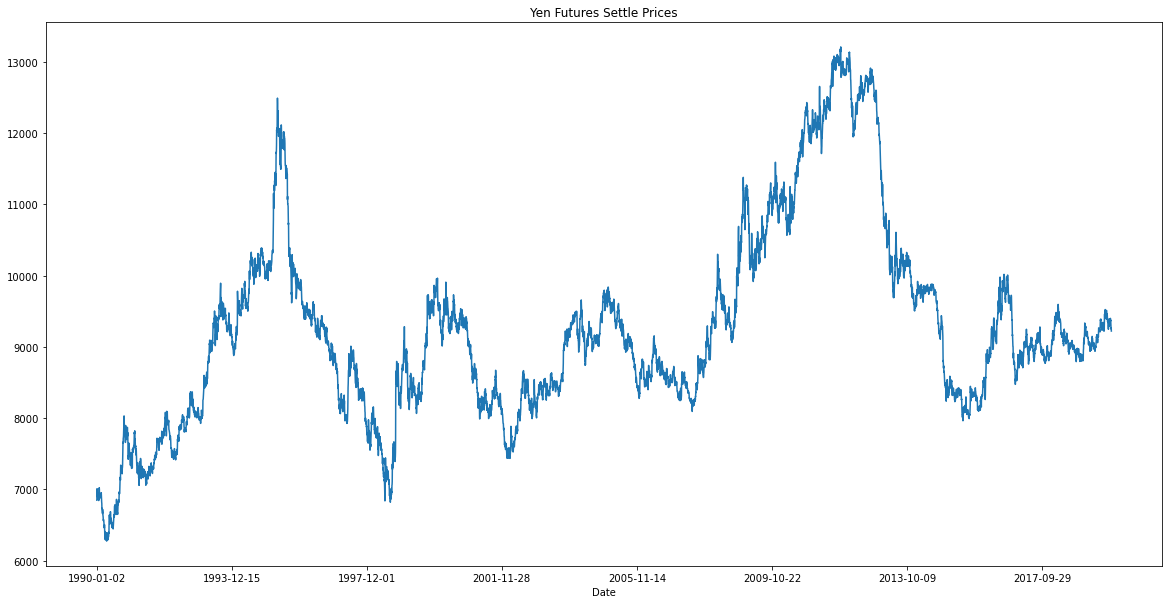

In [4]:
ax=yen_futures['Settle'].plot(figsize=(20,10),title="Yen Futures Settle Prices")

In [5]:
import statsmodels.api as sm
noise,trend=sm.tsa.filters.hpfilter(yen_futures['Settle'])

In [6]:
tmp_frame=pd.concat({'Settle':yen_futures['Settle'],'Noise':noise,'Trend':trend},axis=1)
print(tmp_frame)

            Settle      Noise        Trend
Date                                      
1990-01-02  6847.0 -61.503967  6908.503967
1990-01-03  6887.0 -21.799756  6908.799756
1990-01-04  7008.0  98.942896  6909.057104
1990-01-05  6950.0  40.776052  6909.223948
1990-01-08  6959.0  49.689938  6909.310062
...            ...        ...          ...
2019-10-09  9338.0  24.939247  9313.060753
2019-10-10  9303.5  -5.868559  9309.368559
2019-10-11  9251.0 -54.454594  9305.454594
2019-10-14  9265.0 -36.423060  9301.423060
2019-10-15  9221.5 -75.844123  9297.344123

[7515 rows x 3 columns]


<AxesSubplot:xlabel='Date'>

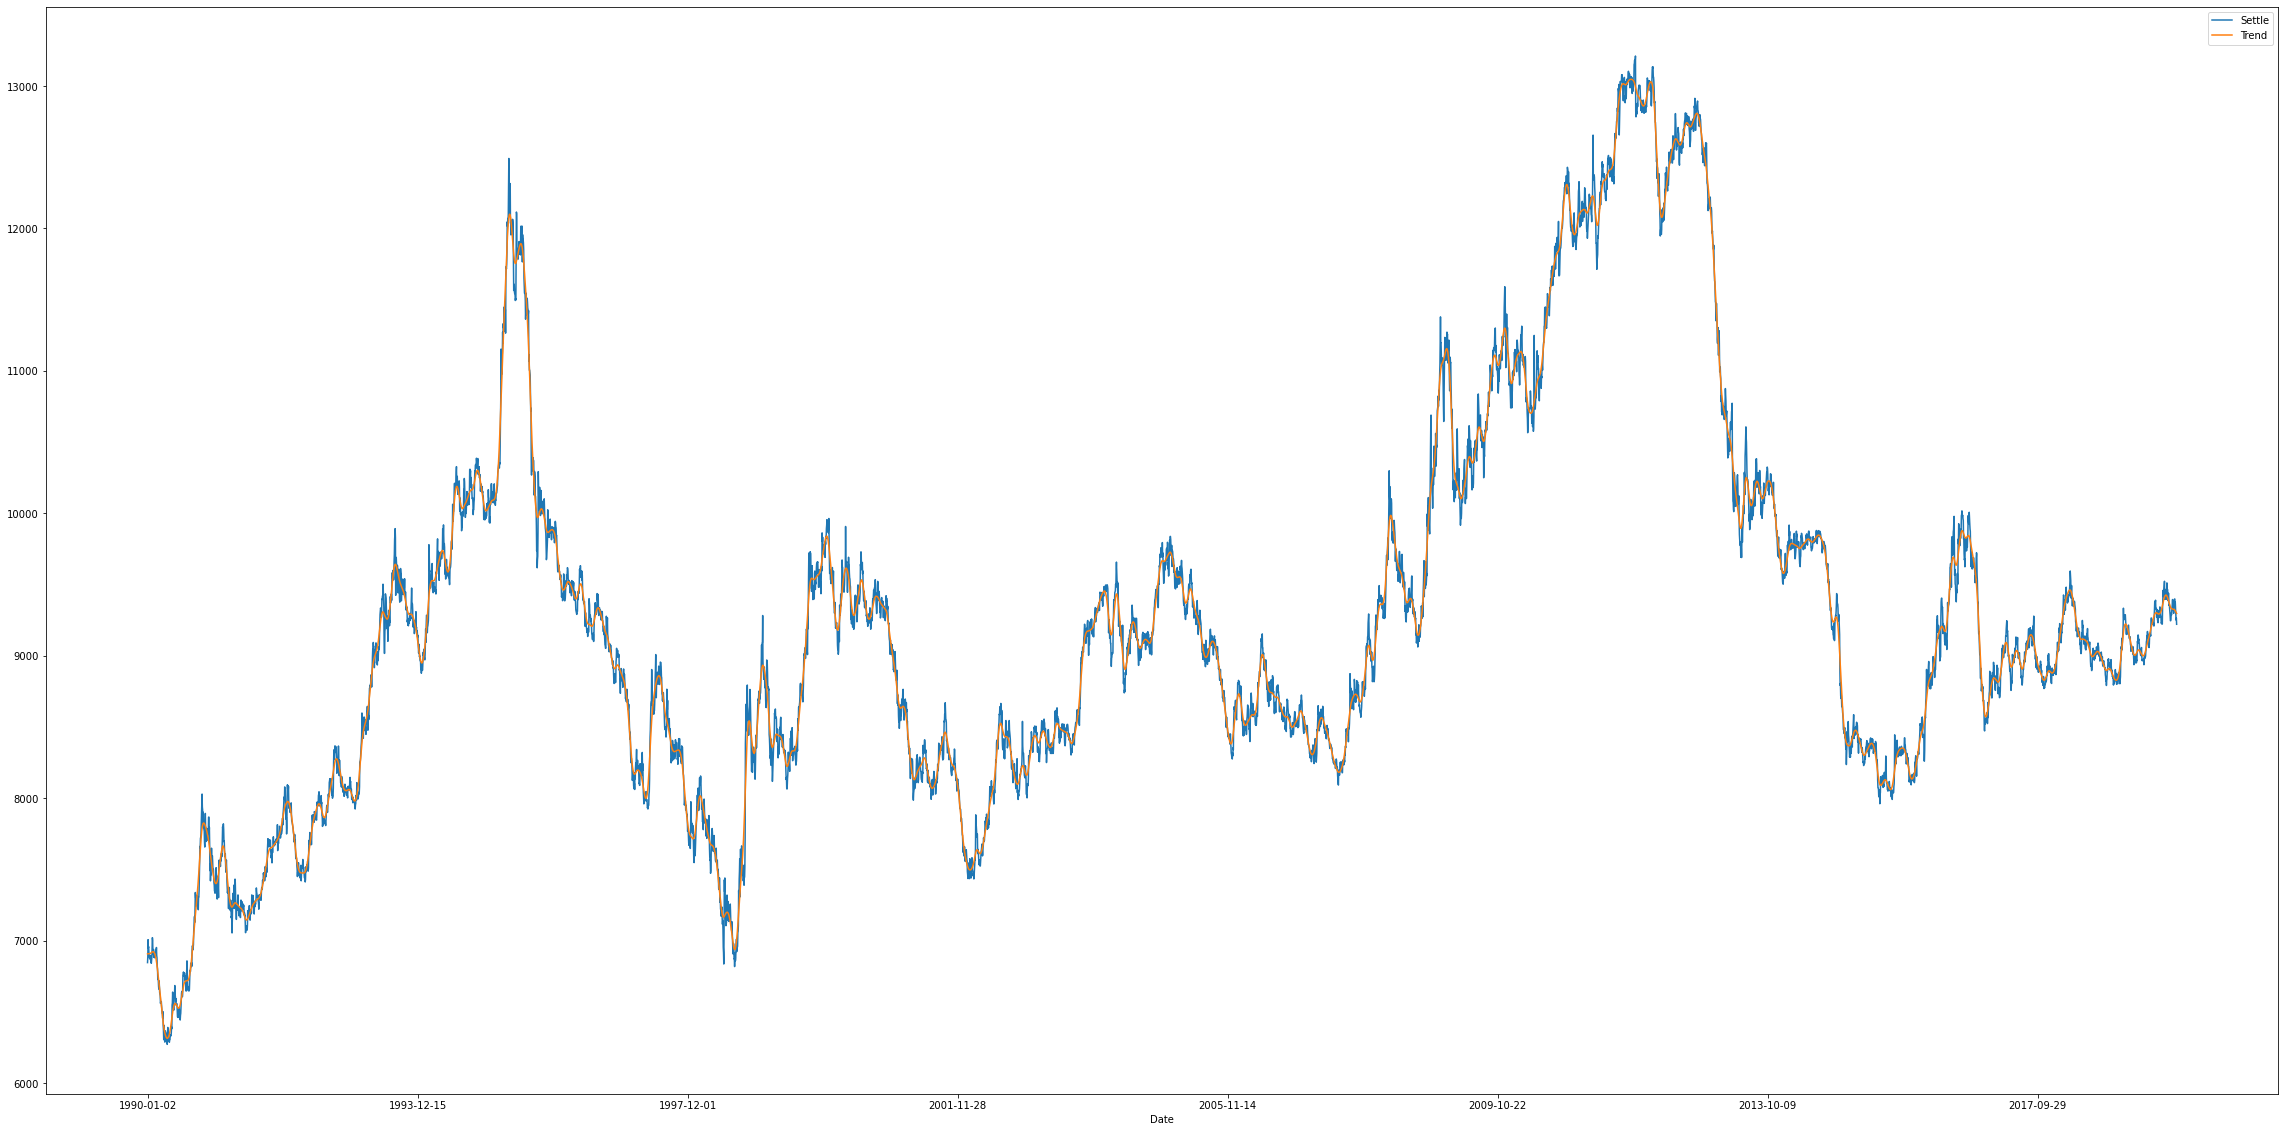

In [7]:
tmp_frame[['Settle','Trend']].plot(figsize=(40,20))

<AxesSubplot:xlabel='Date'>

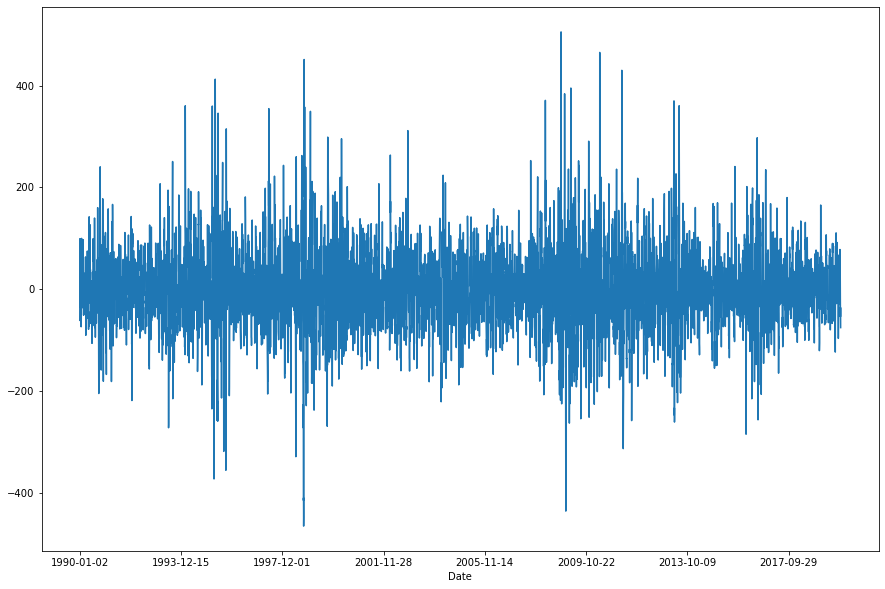

In [8]:
noise.plot(figsize=(15,10))

In [9]:
from statsmodels.tsa.arima_model import ARMA

returns=yen_futures['Settle'].pct_change()*100
returns=returns.dropna()
print(returns)

Date
1990-01-03    0.584197
1990-01-04    1.756933
1990-01-05   -0.827626
1990-01-08    0.129496
1990-01-09   -0.632275
                ...   
2019-10-09   -0.410601
2019-10-10   -0.369458
2019-10-11   -0.564304
2019-10-14    0.151335
2019-10-15   -0.469509
Name: Settle, Length: 7514, dtype: float64


In [10]:
model = ARMA(returns.values, order=(2,1))
results = model.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

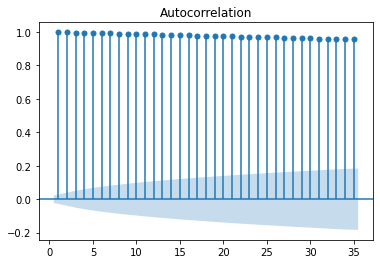

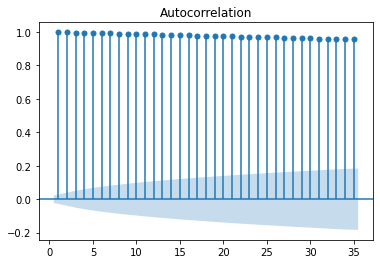

In [12]:
plot_acf(tmp_frame.Settle, zero=False, lags=35)

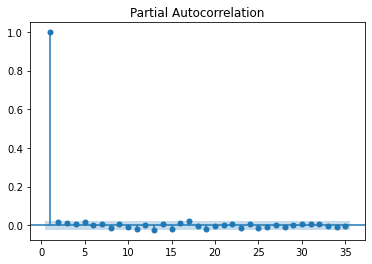

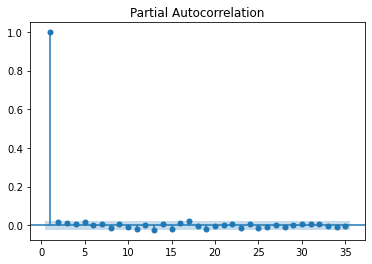

In [13]:
plot_pacf(tmp_frame.Settle, zero=False, lags=35)

In [14]:
yen_frame = pd.read_csv(Path("yen.csv"),infer_datetime_format=True, parse_dates=True)
model = ARIMA(yen_frame.Settle,order=(5,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Settle   No. Observations:                10902
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -59615.147
Date:                Sat, 12 Dec 2020   AIC                         119244.294
Time:                        10:38:04   BIC                         119295.370
Sample:                             0   HQIC                        119261.509
                              - 10902                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0051      1.372     -0.004      0.997      -2.694       2.684
ar.L2         -0.0049      0.016     -0.309      0.757      -0.036       0.026
ar.L3         -0.0071      0.010     -0.709      0.478      -0.027       0.013
ar.L4         -0.0149      0.013     -1.177      0.239      -0.040       0.010
ar.L5         -0.0050      0.021     -0.234      0.815      -0.047       0.037
ma.L1         -0.0052      1.372     -0.004      0.997      -2.694       2.684
sigma2      3295.2226     20.596    159.997      0.000    3254.856    3335.589
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             28417.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.64   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Plot 5 Day Price Forecast
forecast=results.forecast(steps=5)

AxesSubplot(0.125,0.125;0.775x0.755)


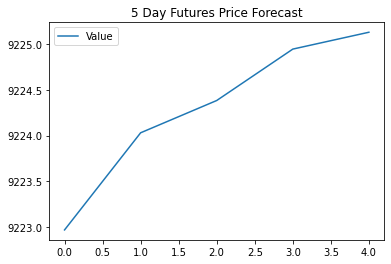

In [16]:
tmp_index=[0,1,2,3,4]
tmp_frame=pd.DataFrame({'Value':forecast.values})
print(tmp_frame.plot(title="5 Day Futures Price Forecast"))

In [17]:
from arch import arch_model

In [18]:
# Estimate a GARCH model:
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
results=model.fit(disp="off")

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Sat, Dec 12 2020   Df Residuals:                     7510
Time:                        10:38:08   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [20]:
# Find the last day of the dataset
import numpy
returns_index = returns.index.values
#last_day=numpy.amax(returns_index)

#print(last_day)
#print(type(last_day))

print(returns.index)

Index(['1990-01-03', '1990-01-04', '1990-01-05', '1990-01-08', '1990-01-09',
       '1990-01-10', '1990-01-11', '1990-01-12', '1990-01-15', '1990-01-16',
       ...
       '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-07', '2019-10-08',
       '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14', '2019-10-15'],
      dtype='object', name='Date', length=7514)


In [24]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
forecasts = results.forecast(horizon=forecast_horizon)

In [25]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [26]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


AxesSubplot(0.125,0.125;0.775x0.755)


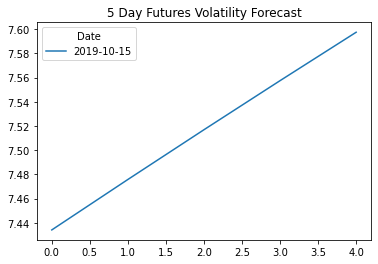

In [29]:
#final.plot(title="5 Day Forecast of Volatility")
final_frame=pd.DataFrame(final).reset_index()
print(final_frame.plot(title="5 Day Futures Volatility Forecast"))